# HW5

The goal of this HW is to use decision trees to find what made it more or less likely to survive the Titanic sinking in 1912.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


## Cleaning

We will start by cleaning the data set. This part is already done it for you. So, you should just execute the code below.

In [2]:
df = pd.read_csv("titanic.csv")

Get rid of useless attributes

In [3]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

Binarize gender

In [4]:
df['Male'] = df.Sex == 'male'

In [5]:
df.drop(['Sex'], axis=1, inplace=True)

Make dummy variables for port of origin

In [6]:
df = pd.get_dummies(data=df,columns=['Embarked'])


Remove the nulls

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,0,0,1
1,1,1,38.0,1,0,71.2833,False,1,0,0
2,1,3,26.0,0,0,7.9250,False,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,0,1


## Data set description
After cleaning, we have a DataFrame df, which reports the passengers of the Titanic (one row per passenger). The columns are:
<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

### Question 1 (1 pt)

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 1</b> (i.e., one root and two leaf nodes) to find the differences between those who survived and those who didn't. 

In [9]:
X = df.drop('Survived',axis=1)

In [10]:
Y = df.Survived

In [11]:
dt = tree.DecisionTreeClassifier(max_depth=1)

In [12]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

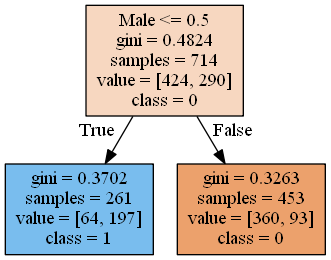

In [13]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 2 (1 pt)

In one sentence, explain what the decision tree tells us. Write your answer in a markdown cell.

Of the 715 samples considered, 261 are females and 453 are males. Of the 261 females, 64 have died and 197 have survived. Of the 453 males, 360 have died and only 93 survived. Of the 714 people considered, 424 died and only 290 survived. Hence more people have died than survived, hence the overall class of the decision tree is 0. 

### Question 3 (1 pt)

Use <b>one</b> seaborn chart to <b>statistically</b> validate what you found in the previous question. <b>Use only one Jupyter cell</b>; if you provide more than one cell, you will be graded only on the first one (the others will be ignored).

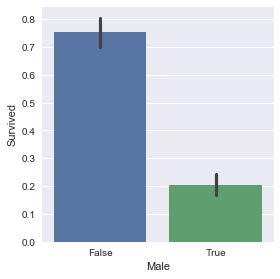

In [21]:
sns.factorplot(y='Survived',x='Male', data=df,kind='bar',aspect=1)

### Question 4 (1 pt)

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves.

In [22]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [23]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

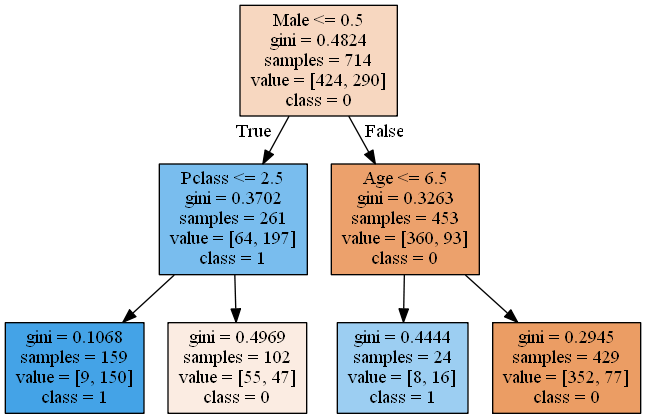

In [24]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 5 (2 pts)

The tree found in your previous question should involve three predictors. Guided from what the tree tells you, detect an interesting finding involving <b>two</b> of these three predictors and show its validity through seaborn. 
<p><b>Format and grading:</b> For this question, you will be graded on <b>the first two Jupyter cells following this cell</b> (<b>the following cells will be ignored, without exception</b>). The first cell following this cell must be a markdown cell with your finding written in English. The second cell must contain the code that builds a seaborn chart: this chart must <b>statistically</b> validate your finding. 

Write your finding in this cell

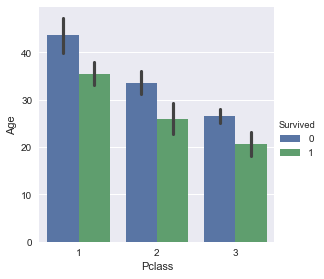

In [28]:
sns.factorplot(y='Age',x='Pclass', data=df,kind='bar', hue = 'Survived', aspect=1)